### Student Information
Name: 黃羽繪

Student ID: 113030507

GitHub ID: yuhuimee

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### ----- 引入必要套件 -----###
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 0. 讀檔與 data info

In [3]:
# 讀取 CSV 檔案，並以 DataFrame 格式呈現
import pandas as pd

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [4]:
# 檢查各欄位多有少缺失值:只有 "downvotes" 和 "upvote_ratio" 兩個欄位各自缺少 847-64=783 個值
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [5]:
# 觀察各數值型欄位 (Dtype=float64) 的分布情況
df.describe()

,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Data Preprocessing
    - 觀察各欄位 與 "label" 的關聯性，並以視覺化圖表呈現，並決定是否選用該欄位作為後續分析

### 1.1 以下欄位與本次分析較無關聯，可忽略 :
    - "datetime"、"post_id"、"author"、"url"、"entities"


### 1.2 數值型欄位以 Boxplot 進行分析:
    - "upvotes" : 中位數接近 0，不同 label 間的差異不大，說明 upvotes 和情緒正負關係不強，不選用。
    - "downvotes" : 幾乎所有值都在 0 附近，且缺失值太多，不選用。
    - "upvote_ratio" : 可看出 upvote_ratio >0.8 的 label 不是 0 就是 1，但考量到所有非 null 的 upvote_ratio 資料中只有小於 25% 的值不是 1，且缺失值太多，不選用。
    - "subjectivity" : label -1 與 1 的 subjectivity 中位數都偏高，0 （中立）的 subjectivity 明顯更低，和 label 有合理關聯，選用。
    - "polarity" : -1 主要集中在負值區間、0 集中在 0 附近、1 有更多正值分布，和 label 的定義吻合，選用。

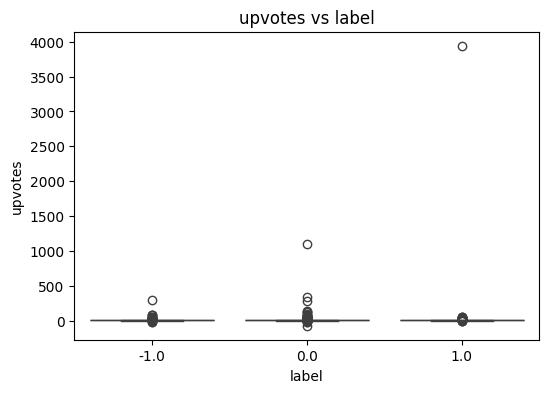

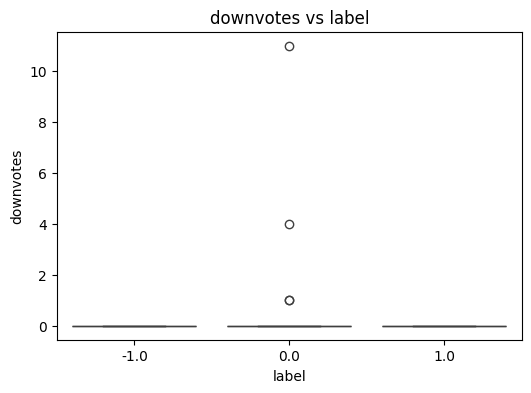

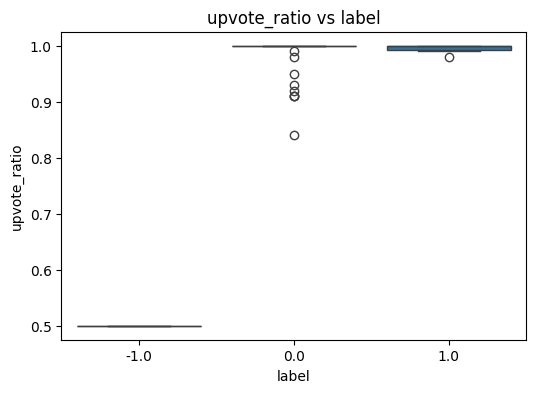

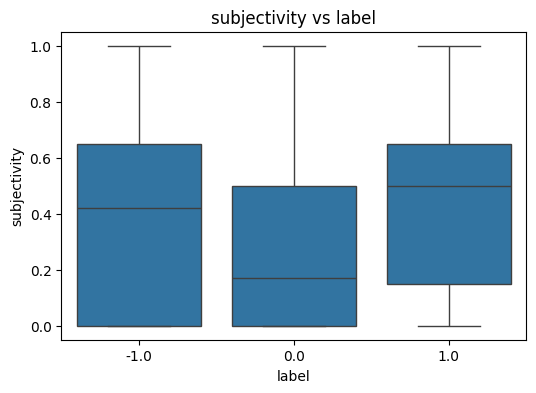

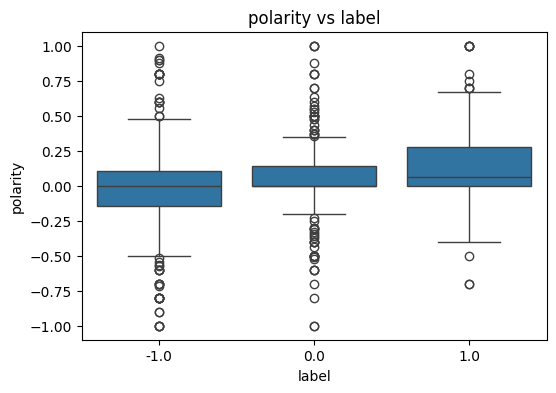

In [6]:
# 數值型欄位以 Boxplot 進行分析: "upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity" 

import seaborn as sns
import matplotlib.pyplot as plt

features = ["upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity"]

for col in features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="label", y=col, data=df)
        plt.title(f"{col} vs label")
        plt.show()

### 1.3 類別型資料以 Bar plot 分析
    - "type": 整體分布不平衡，comment 壓倒性多，不選用。
    - "subreddit": stockstobuytoday 偏向中立/正向，StockMarket 與 stocks 有較多負向，不同類別 subreddit 在有不同分布情況，可能存在潛在關聯，選用。

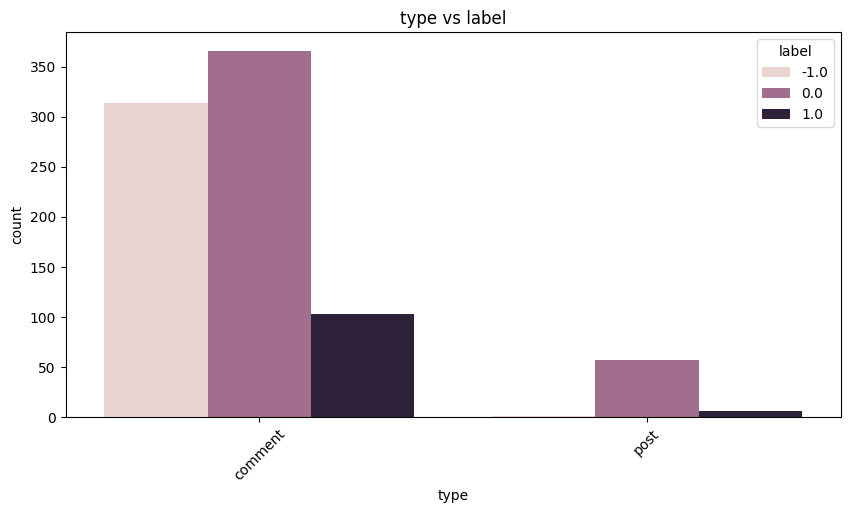

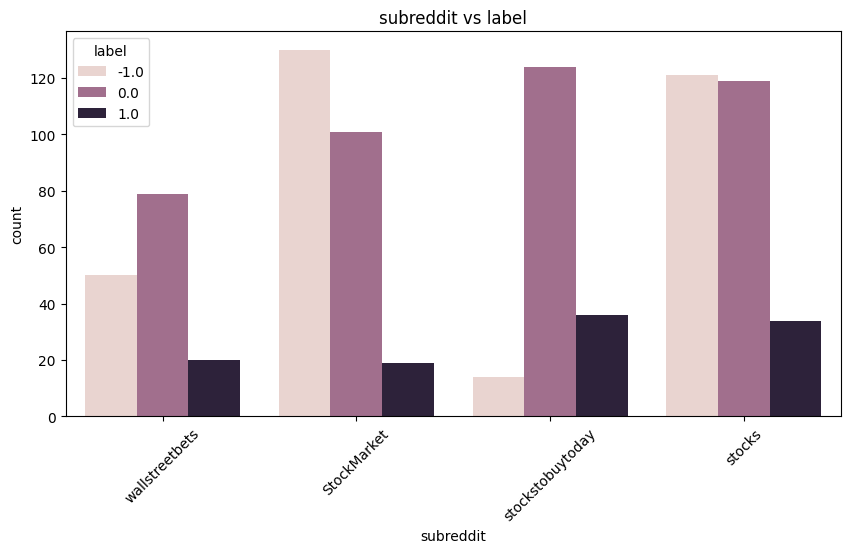

In [7]:
# 2. 類別型資料以 Bar plot 分析:"type", "subreddit"

features_class = ["type", "subreddit"]

for col in features_class:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, hue="label", data=df)
        plt.title(f"{col} vs label")
        plt.xticks(rotation=45)
        plt.show()

### 1.4 文字型欄位以 heat map 與 bar plot 進行分析 

1.4.1 分析 "text" 與 "label" 的關聯性

In [8]:
# 擷取必要欄位並檢視
text_cols=["text","label"]
df_text = df[text_cols]

df_text

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [9]:
### ----- 將 text 轉換成 token 的形式 ----- ###
df_text["tokens"] = df_text["text"].astype(str).str.split(" ")
df_text.head()

C:\Users\user\AppData\Local\Temp\ipykernel_1804\2917504811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["tokens"] = df_text["text"].astype(str).str.split(" ")


,text,label,tokens
0,Calls on retards,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker.]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,"[He, didn’t, say, thank, you.]"


In [10]:
### ----- 將 text 內容向量化，並瀏覽詞彙表相關資訊 ------ ### 
from sklearn.feature_extraction.text import CountVectorizer

# 用 CountVectorizer 建立「詞-計數」矩陣
vectorizer = CountVectorizer()  
X_counts = vectorizer.fit_transform(df_text["text"].astype(str))

print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))
print("- 所有詞彙:", vectorizer.get_feature_names_out())
print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))

print("- 印出第 500 份文件的文字向量與值:\n",X_counts[500])

- 詞彙表大小: 4346
- 所有詞彙: ['00' '000' '01378' ... 'zgld' 'zone' 'zsil']
- 詞彙表大小: 4346
- 印出第 500 份文件的文字向量與值:
   (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3848))	4
  (np.int32(0), np.int32(2149))	2
  (np.int32(0), np.int32(3866))	1
  (np.int32(0), np.int32(1604))	1
  (np.int32(0), np.int32(374))	1
  (np.int32(0), np.int32(675))	1
  (np.int32(0), np.int32(3095))	2
  (np.int32(0), np.int32(3652))	1
  (np.int32(0), np.int32(4224))	1
  (np.int32(0), np.int32(4322))	1
  (np.int32(0), np.int32(2374))	1
  (np.int32(0), np.int32(2424))	2
  (np.int32(0), np.int32(1808))	1
  (np.int32(0), np.int32(1415))	2
  (np.int32(0), np.int32(3843))	1
  (np.int32(0), np.int32(583))	2
  (np.int32(0), np.int32(3796))	2
  (np.int32(0), np.int32(1284))	1


In [12]:
### ----- 製作詞頻表 ----- ###
text_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
text_df

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


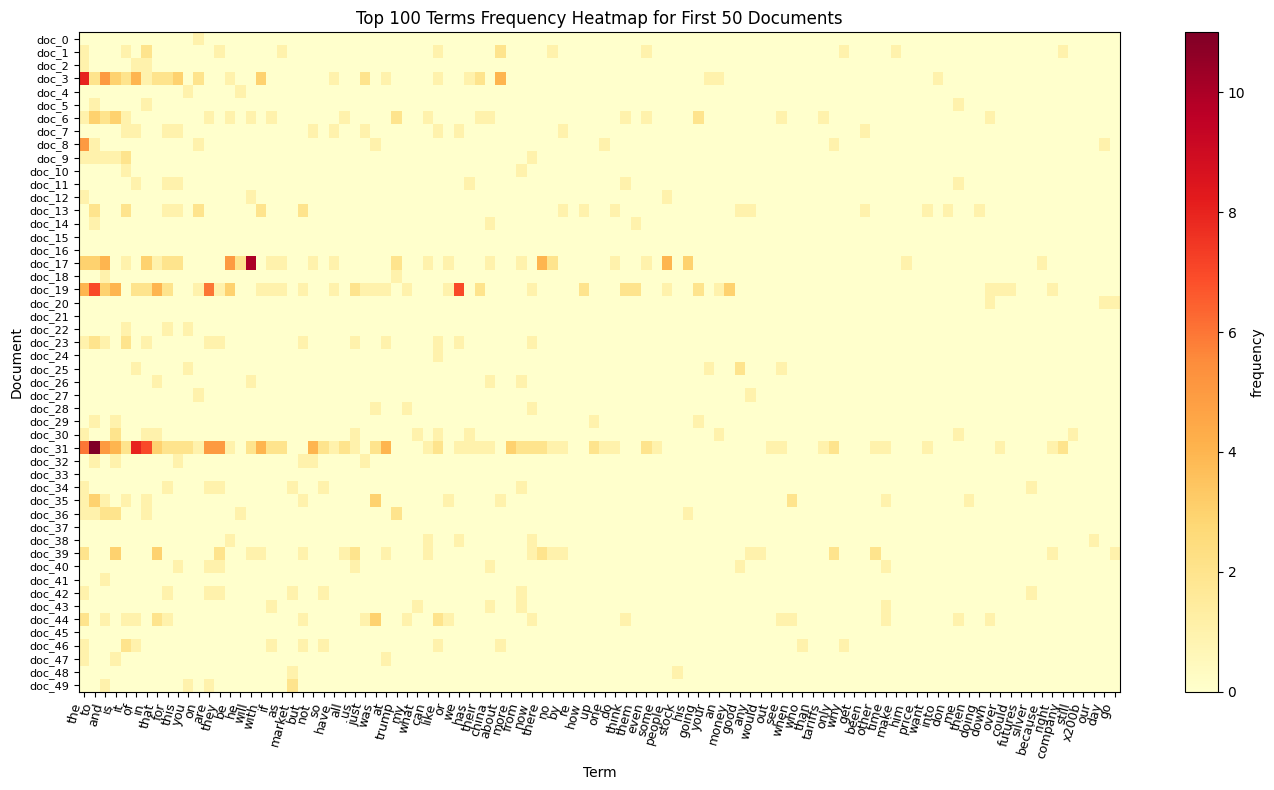

In [13]:
### --- 製作熱點圖呈現 term 在各文件中的出現頻率 ----- ###

# 前面已用 CountVectorizer 建立「詞→計數」矩陣
# vectorizer = CountVectorizer()  
# X_counts = vectorizer.fit_transform(df_text["text"].astype(str))

terms = vectorizer.get_feature_names_out()

# 找出全語料中出現次數前 100 名的詞 
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()             # 每個詞在全集合的出現次數
top_k = 100
top_idx = np.argsort(term_freq)[::-1][:top_k]             # 由大到小取前100
top_terms = terms[top_idx]

# 取前 50 份文件 × 前 100 常見詞 的子矩陣
n_docs_show = min(50, X_counts.shape[0])
submat = X_counts[:n_docs_show, :][:, top_idx].toarray()         # (50, 100)

# 繪圖
plt.figure(figsize=(14, 8))
im = plt.imshow(submat, aspect="auto", cmap="YlOrRd")  # cmap="YlOrRd" 改成淺色
plt.colorbar(im, label="frequency")
plt.title(f"Top {top_k} Terms Frequency Heatmap for First {n_docs_show} Documents")
plt.xlabel("Term")
plt.ylabel("Document")

# X 軸放 term 
step = max(1, len(top_terms)//100)  # 顯示 100 個刻度
plt.xticks(ticks=np.arange(0, len(top_terms), step),
           labels=top_terms[::step], rotation=75, ha="right", fontsize=9)

# Y 軸放文件編號
plt.yticks(ticks=np.arange(n_docs_show),
           labels=[f"doc_{i}" for i in range(n_docs_show)], fontsize=8)

plt.tight_layout()
plt.show()

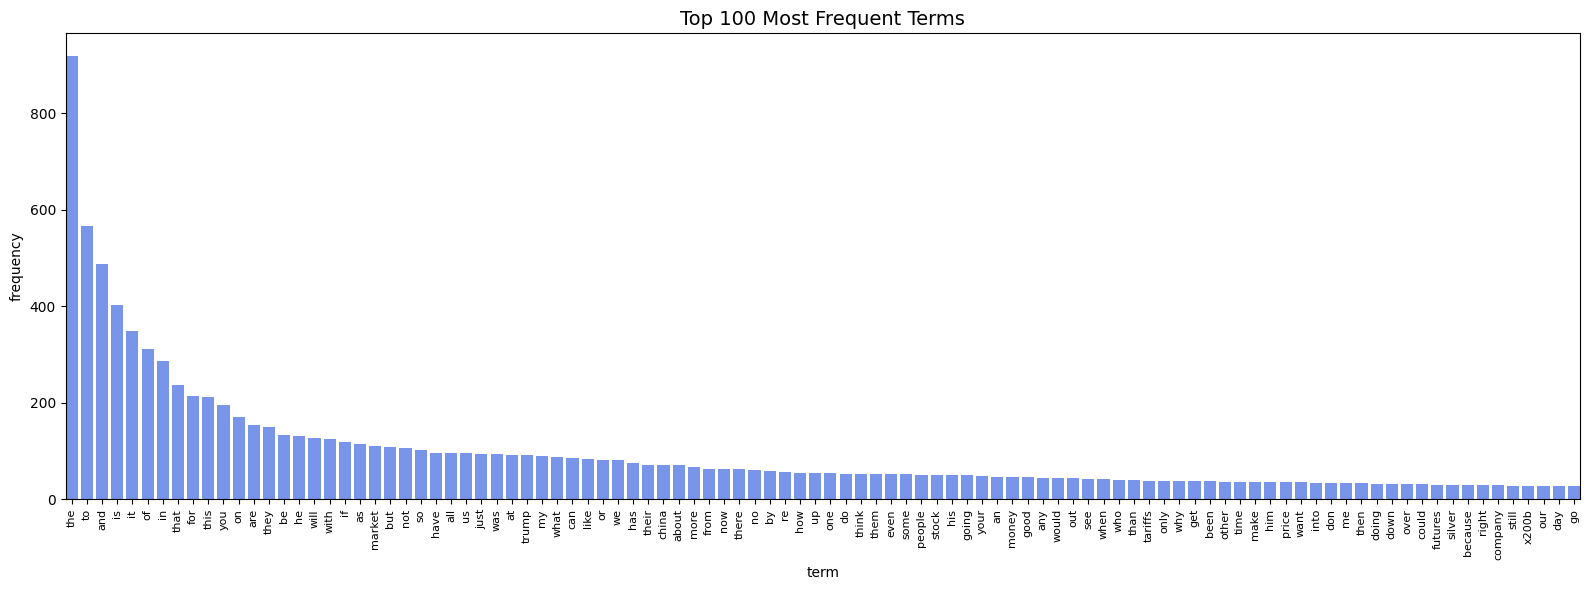

In [14]:
# 取出前 100 常見的詞並統計其出現頻率
top_k = 100
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_k]
top_terms = terms[top_idx]
top_counts = term_freq[top_idx]

# 建成 DataFrame
freq_df = pd.DataFrame({"term": top_terms, "frequency": top_counts})

# 繪製 bar plot 
plt.figure(figsize=(16, 6))
plt.margins(x=0)
plt.bar(freq_df["term"], freq_df["frequency"], color="royalblue", alpha=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {top_k} Most Frequent Terms", fontsize=14)
plt.xlabel("term")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

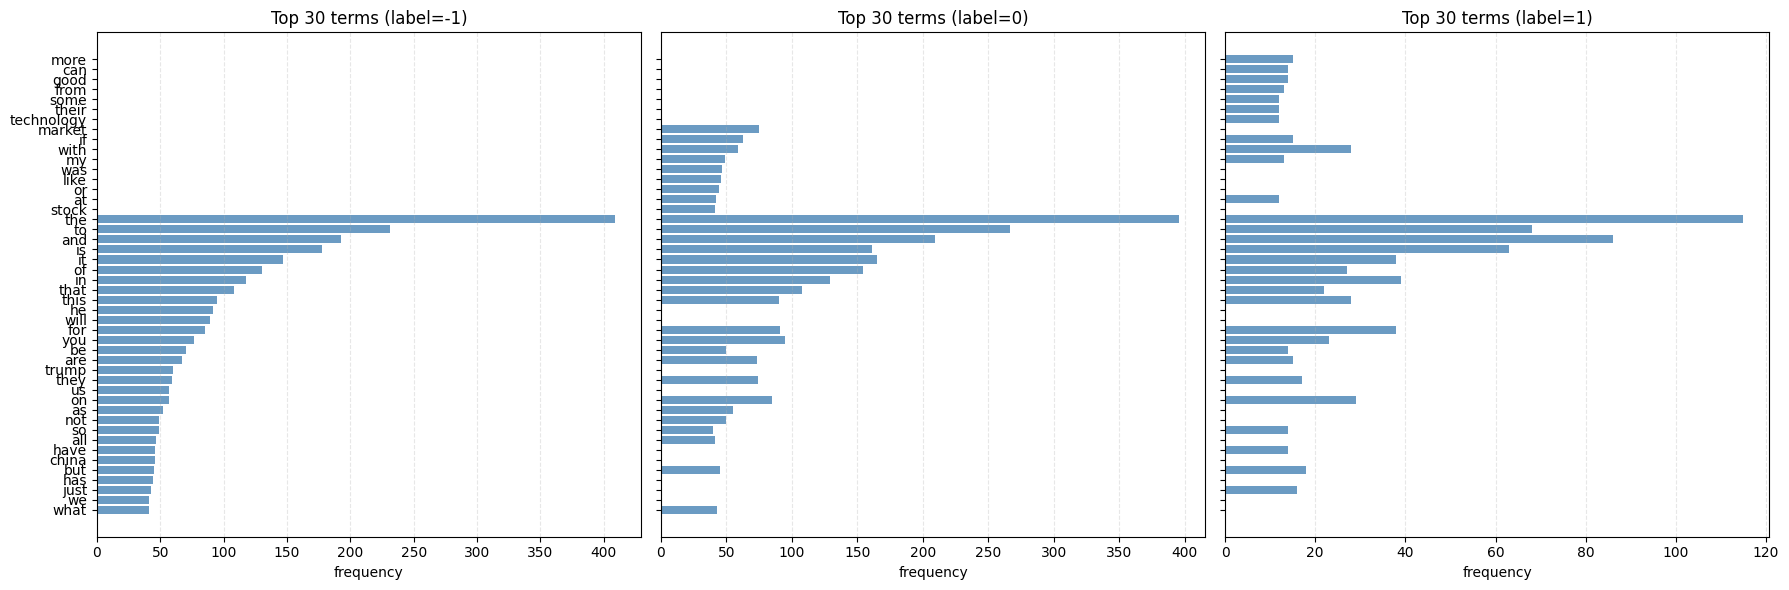

In [15]:
### ----- 比較前 k 個常見的 term 中，出現在 "label" = 1, 0, -1 的 doc 頻率 ----- ###

# 計算各 label 下的詞頻
labels = df_text["label"].values
label_values = sorted(pd.Series(labels).unique())   # [-1.0, 0.0, 1.0]
per_label_counts = {}
for l in label_values:
    rows = (labels == l)
    per_label_counts[l] = np.asarray(X_counts[rows].sum(axis=0)).ravel()

# 針對每個 label 取 Top-N
TOPN = 30
fig, axes = plt.subplots(1, len(label_values), figsize=(18, 6), sharey=True)

for ax, l in zip(axes, label_values):
    counts = per_label_counts[l]
    top_idx = np.argsort(counts)[::-1][:TOPN]
    top_terms = terms[top_idx]
    top_counts = counts[top_idx]

    # 讓可讀性更好：水平條圖 + 由小到大畫（條從下到上遞增）
    order = np.argsort(top_counts)
    ax.barh(top_terms[order], top_counts[order], color="steelblue", alpha=0.8)
    ax.set_title(f"Top {TOPN} terms (label={int(l)})")
    ax.set_xlabel("frequency")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


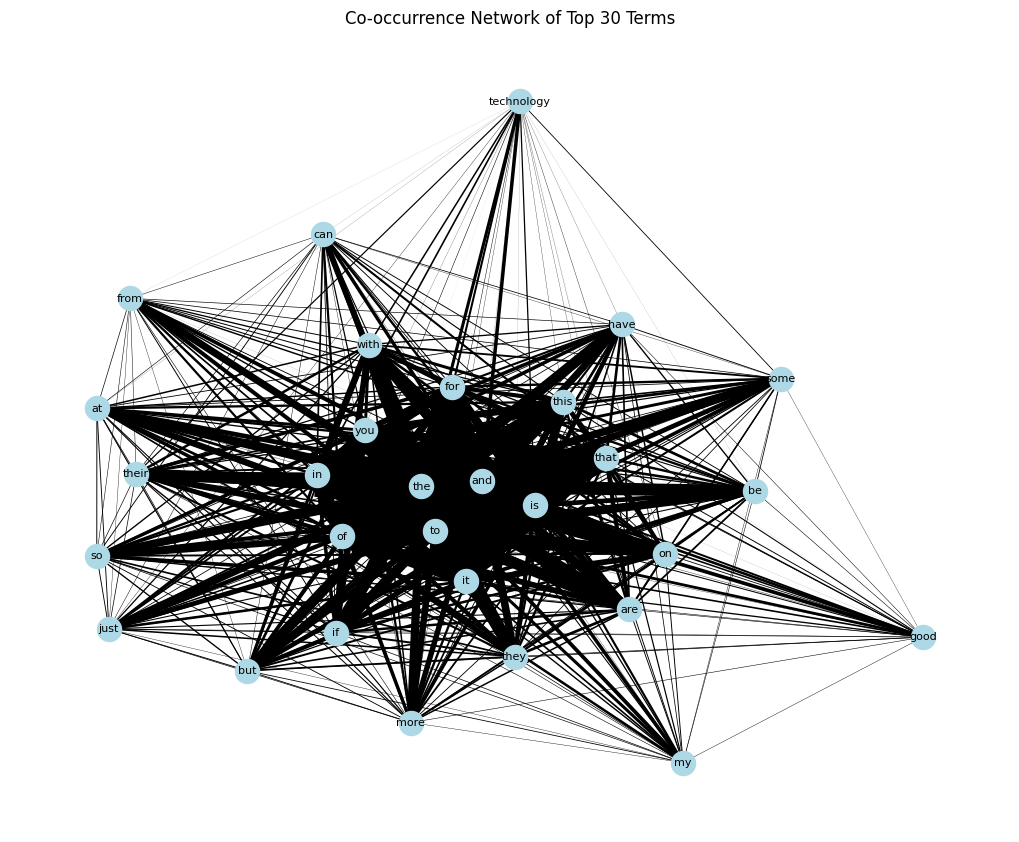

In [16]:
### ----- 其他可視化工具 (1):前 30 常見的詞彙關聯圖(連線顏色越深表示同時出現在同一份文件裡的次數越多) ----- ###
import networkx as nx
from itertools import combinations

# 簡單共現矩陣（同文件出現）
co_matrix = (X_counts.T @ X_counts).toarray()
np.fill_diagonal(co_matrix, 0)

# 取前 30 詞，建立圖
top_n = 30
co_top = co_matrix[top_idx[:top_n], :][:, top_idx[:top_n]]
G = nx.Graph()

for i in range(top_n):
    for j in range(i+1, top_n):
        if co_top[i, j] > 0:
            G.add_edge(top_terms[i], top_terms[j], weight=co_top[i, j])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8,
        width=[d['weight']/50 for (_,_,d) in G.edges(data=True)])
plt.title("Co-occurrence Network of Top 30 Terms")
plt.show()


In [17]:
!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [18]:
### ----- 其他可視化工具 (2) : 文字雲，將出現頻率較高的文字放大呈現在雲中 (套件下載問題尚未解決) ----- ###
# from wordcloud import WordCloud

# word_freq = dict(zip(terms[top_idx], term_freq[top_idx]))
# wc = WordCloud(width=800, height=400, background_color="white", colormap="inferno")
# wc.generate_from_frequencies(word_freq)

# plt.figure(figsize=(12, 6))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.title("Word Cloud of Top Terms")
# plt.show()


1.4.2 分析 "title" 與 "label" 的關聯性

In [19]:
title_cols=["title","label"]
df_title = df[title_cols]

df_title

,title,label
0,Retardation is on the menu boys! WSB is so back,-1.0
1,Retail giant TARGET has now declined for 10 co...,0.0
2,How do you feel about a sitting president maki...,0.0
3,Who knows more? $VMAR,1.0
4,The Trump administration is begging Xi Jinping...,-1.0
...,...,...
842,$MRIN Marin Software killed it today. Hope som...,1.0
843,$ U.S. dollar value (crashing),0.0
844,Analyst Recommendations,0.0
845,Weekend Discussion Thread for the Weekend of A...,-1.0


In [20]:
### ----- 將 title 內容向量化，並瀏覽詞彙表相關資訊 ------ ### 
from sklearn.feature_extraction.text import CountVectorizer

# 用 CountVectorizer 建立「詞-計數」矩陣
vectorizer = CountVectorizer()  
X_counts = vectorizer.fit_transform(df_title["title"].astype(str))

print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))
print("- 所有詞彙:", vectorizer.get_feature_names_out())
print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))

print("- 印出第 500 份文件的文字向量與值:\n",X_counts[500]) # 所有 doc 中每一個 term 的 (向量, 字詞出現頻率)

- 詞彙表大小: 601
- 所有詞彙: ['000' '04' '08' '10' '100k' '10k' '11' '12' '125' '14' '145' '16' '18'
 '1952' '20' '2008' '2014' '2022' '2025' '22' '234' '250' '300' '34' '350'
 '415m' '43' '50' '75k' 'aal' 'about' 'acceleration' 'acquisition'
 'administration' 'advantage' 'advantages' 'advice' 'advisors' 'aerospace'
 'after' 'ahro' 'ai' 'airo' 'aka' 'all' 'allies' 'alternus' 'amc' 'an'
 'analysis' 'analyst' 'and' 'anix' 'announces' 'another' 'any' 'anybody'
 'anyone' 'apls' 'apr' 'april' 'are' 'artw' 'as' 'asked' 'assets' 'at'
 'atlx' 'atus' 'authority' 'auy' 'available' 'avoiding' 'awful' 'back'
 'bagger' 'ballistc' 'bbig' 'be' 'been' 'begging' 'being' 'best' 'bets'
 'big' 'bitcoin' 'bkkt' 'blackrock' 'blown' 'bnzi' 'bond' 'boys'
 'breaking' 'bridging' 'bullish' 'bunch' 'busy' 'buy' 'buyback' 'buying'
 'by' 'call' 'campaign' 'cancer' 'caps' 'cash' 'cel' 'chair' 'cheap'
 'check' 'china' 'citadel' 'clean' 'climb' 'close' 'clov' 'clvs' 'cn'
 'coinbase' 'com' 'commitment' 'company' 'complete' 'co

In [21]:
### ----- 製作詞頻表 ----- ###
title_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
title_df

,000,04,08,10,100k,10k,11,12,125,14,...,xrtx,yamana,year,yield,yields,yolo,yoshitsu,you,your,ytd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


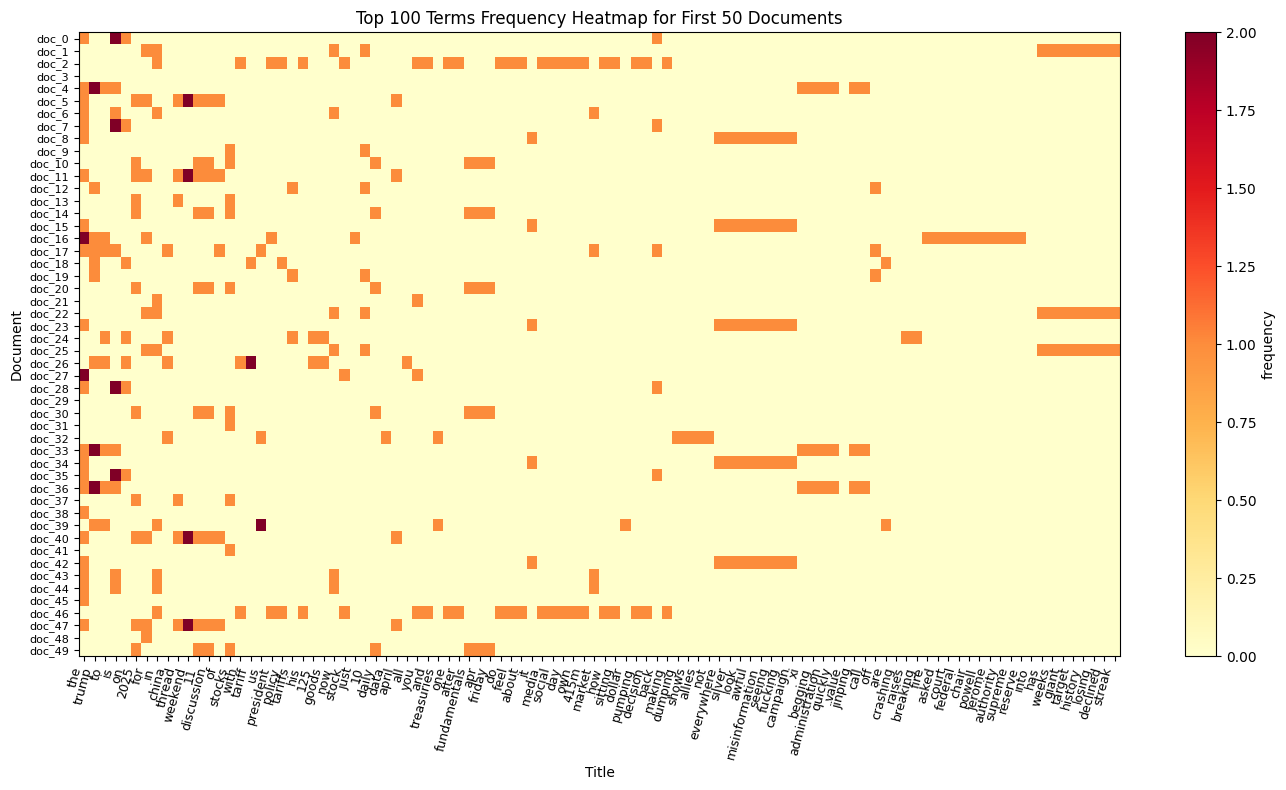

In [22]:
### ----- 以熱點圖分析前 k 常見的 term 在前 m 份文件中出現的頻率情況 ----- ###
terms = vectorizer.get_feature_names_out()

# 找出全語料中出現次數前 100 名的詞 
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()             # 每個詞在全集合的出現次數
top_k = 100
top_idx = np.argsort(term_freq)[::-1][:top_k]             # 由大到小取前100
top_terms = terms[top_idx]

# 取前 50 份文件 × 前 100 常見詞 的子矩陣
n_docs_show = min(50, X_counts.shape[0])
submat = X_counts[:n_docs_show, :][:, top_idx].toarray()         # (50, 100)

# 繪圖
plt.figure(figsize=(14, 8))
im = plt.imshow(submat, aspect="auto", cmap="YlOrRd")  # cmap="YlOrRd" 改成淺色
plt.colorbar(im, label="frequency")
plt.title(f"Top {top_k} Terms Frequency Heatmap for First {n_docs_show} Documents")
plt.xlabel("Title")
plt.ylabel("Document")

# X 軸放 term 
step = max(1, len(top_terms)//100)  # 顯示 100 個刻度
plt.xticks(ticks=np.arange(0, len(top_terms), step),
           labels=top_terms[::step], rotation=75, ha="right", fontsize=9)

# Y 軸放文件編號
plt.yticks(ticks=np.arange(n_docs_show),
           labels=[f"doc_{i}" for i in range(n_docs_show)], fontsize=8)

plt.tight_layout()
plt.show()

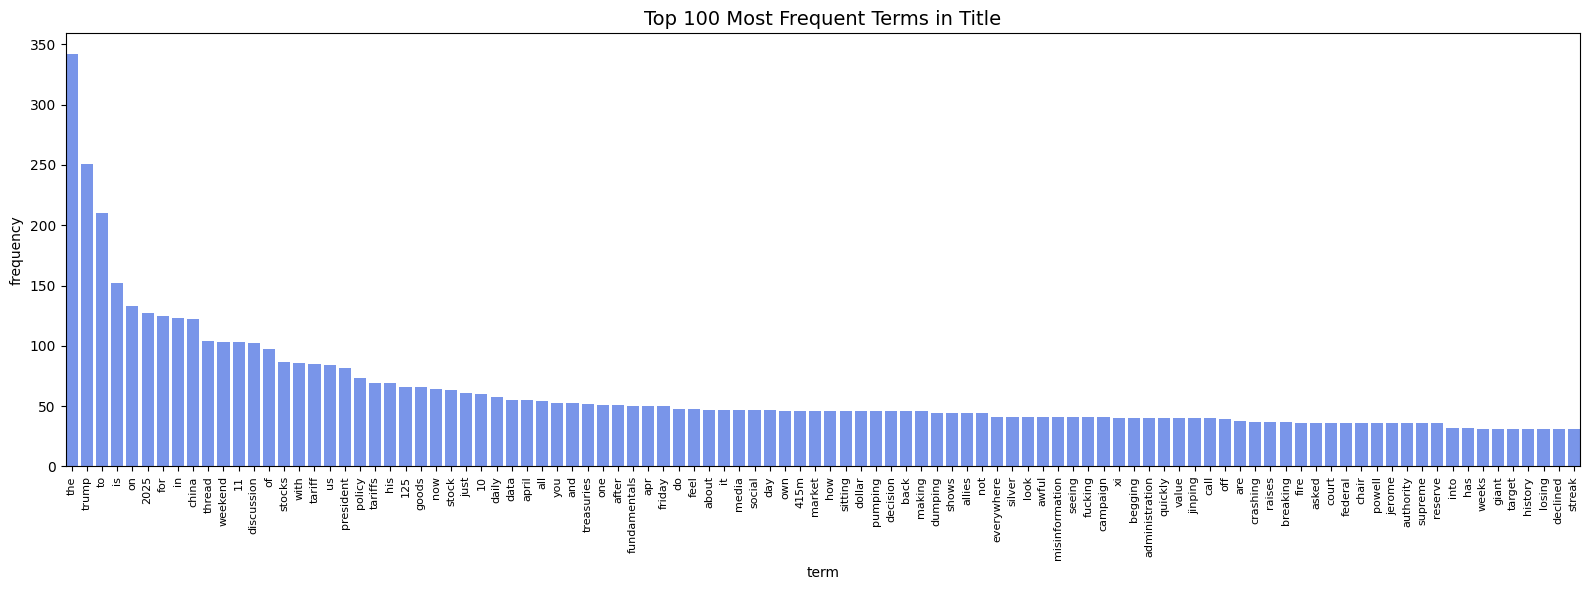

In [23]:
### ----- 取出前 100 常見的詞並統計其出現頻率 ----- ###
top_k = 100
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_k]
top_terms = terms[top_idx]
top_counts = term_freq[top_idx]

# 建成 DataFrame
freq_df = pd.DataFrame({"term": top_terms, "frequency": top_counts})

# 繪製 bar plot 
plt.figure(figsize=(16, 6))
plt.margins(x=0)
plt.bar(freq_df["term"], freq_df["frequency"], color="royalblue", alpha=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {top_k} Most Frequent Terms in Title", fontsize=14)
plt.xlabel("term")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

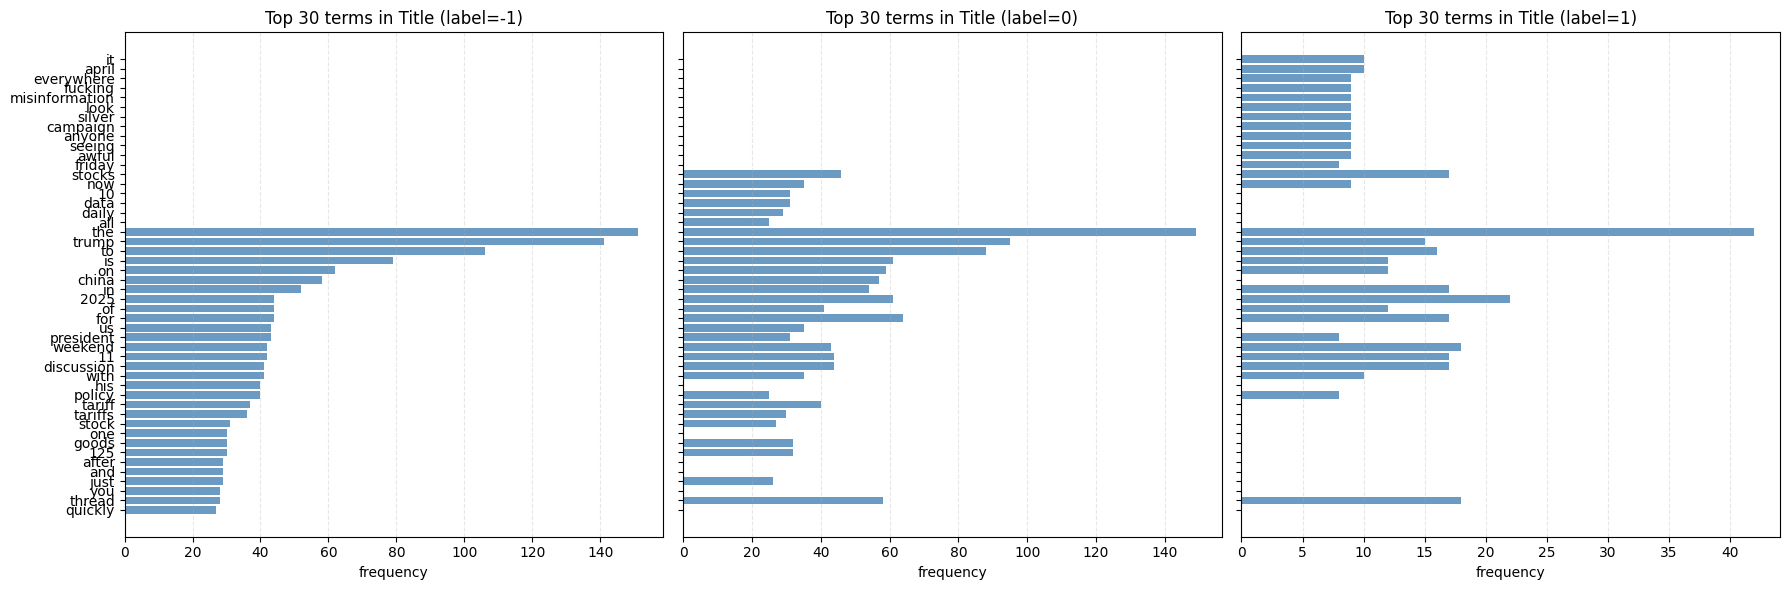

In [24]:
### ----- 比較前 k 個常見的 term 中，出現在 "label" = 1, 0, -1 的 doc 頻率 ----- ###

# 計算各 label 下的詞頻
labels = df_text["label"].values
label_values = sorted(pd.Series(labels).unique())   # [-1.0, 0.0, 1.0]
per_label_counts = {}
for l in label_values:
    rows = (labels == l)
    per_label_counts[l] = np.asarray(X_counts[rows].sum(axis=0)).ravel()

# 針對每個 label 取 Top-N
TOPN = 30
fig, axes = plt.subplots(1, len(label_values), figsize=(18, 6), sharey=True)

for ax, l in zip(axes, label_values):
    counts = per_label_counts[l]
    top_idx = np.argsort(counts)[::-1][:TOPN]
    top_terms = terms[top_idx]
    top_counts = counts[top_idx]

    # 讓可讀性更好：水平條圖 + 由小到大畫（條從下到上遞增）
    order = np.argsort(top_counts)
    ax.barh(top_terms[order], top_counts[order], color="steelblue", alpha=0.8)
    ax.set_title(f"Top {TOPN} terms in Title (label={int(l)})")
    ax.set_xlabel("frequency")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


### phase 1 ends.

In [ ]:
# 根據前面圖表分析篩選出有意義的欄位作為新的資料表 df_selected
df.head()

# 篩選有用欄位
selected_cols = ["text", "title", "subjectivity", "polarity", "entities", "upvotes", "downvotes", "upvote_ratio", "label"]
df_selected = df[selected_cols]

# 顯示前5列
df_selected.head()

# Phase 2

In [ ]:
### Begin Assignment Here